In [1]:
# CONTINUANDO SOBRE O CONJUNTO DE DADOS DA ÚLTIMA ATIVIDADE.
arquivo = open('../vl_avep.dat','r')

In [2]:
texto = arquivo.read()

In [3]:
arquivo.close()

In [4]:
listaLinhas = texto.split('\n')

In [5]:
listaEntradasCruas = []
for linha in listaLinhas:
    listaEntradasCruas.append( linha.split() )

In [6]:
len(listaEntradasCruas[0])

17

In [7]:
#extraindo colunas mais significantes para propósito da atividade
listaSignificantes = []
for x in listaEntradasCruas:
    if len(x) == 17:
        listaSignificantes.append( [
            int(x[1]),float(x[2]),
            int(x[3]),float(x[4])
        ] )

In [8]:
len(listaSignificantes)

3297

In [9]:
import pandas as pd
df = pd.DataFrame(listaSignificantes, columns=[
                    'vikingYear','longitudeAreocentrica',
                    'sol', 'pressaoAtmosfericaMediaDiaria'
                 ])

In [10]:
df.head()

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
0,1,97.039,0,7.624
1,1,97.196,1,7.629
2,1,97.655,2,7.606
3,1,98.113,3,7.581
4,1,98.572,4,7.579


In [11]:
df.describe()

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
count,3297.000000,3297.000000,3297.000000,3297.000000
mean,2.208371,175.332975,932.032150,4.326321
std,0.984382,99.812295,627.184194,7.422470
min,1.000000,0.013000,0.000000,-9.999000
25%,1.000000,95.774000,412.000000,6.867000
50%,2.000000,168.353000,824.000000,7.790000
75%,3.000000,258.612000,1421.000000,8.459000
max,4.000000,359.967000,2245.000000,10.198000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vikingYear                     3297 non-null   int64  
 1   longitudeAreocentrica          3297 non-null   float64
 2   sol                            3297 non-null   int64  
 3   pressaoAtmosfericaMediaDiaria  3297 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 103.2 KB


In [13]:
#verificando valores ausentes e duplicatas
print( df.isnull().sum(),"\n\n\n", df.duplicated().sum())

vikingYear                       0
longitudeAreocentrica            0
sol                              0
pressaoAtmosfericaMediaDiaria    0
dtype: int64 


 0


In [14]:
#verificando noValueFlag de acordo com o documentado em vl_avep.lbl
print(
(df['pressaoAtmosfericaMediaDiaria'] == -9.999).sum(),
(df['pressaoAtmosfericaMediaDiaria'] != -9.999).sum()
)

692 2605


In [15]:
# DEFININDO TRANSFORMAÇÕES E NORMALIZAÇÕES.
#Transformação de campos válidos de pressão em milibar para pascal
def millibarParaPascal(mb=-9.999):
    if mb != -9.999:
        return mb*100
    return -9.999
#Normalizar longitude solar areocentrica
# 0=equinócio para norte, 1=solstício para norte,
# 2=equinócio para sul,   3=solstício para sul.
def normalizarLSA( lsa=0 ):
    if lsa <= 90:
        return 0
    elif lsa > 90 and lsa <=180:
        return 1
    elif lsa > 180 and lsa <=270:
        return 2
    else:
        return 3

In [16]:
#APLICANDO TRANSFORMAÇÕES E NORMALIZAÇÕES
#Pressão atmosférica em unidades SI padrão
df['pressaoAtmosfericaMediaDiaria']=df['pressaoAtmosfericaMediaDiaria'].apply(millibarParaPascal)
#Longitude solar areocentrica abstrata em 4 valores
#df['longitudeAreocentrica']=df['longitudeAreocentrica'].apply(normalizarLSA)

In [17]:
df.head(1)

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
0,1,97.039,0,762.4


In [18]:
# convertendo noValueFlag para média dos campos válidos
subconjunto = df[df['pressaoAtmosfericaMediaDiaria'] != -9.999]
mediaDosValidos = subconjunto['pressaoAtmosfericaMediaDiaria'].mean()
print(mediaDosValidos)
df['pressaoAtmosfericaMediaDiaria']=df['pressaoAtmosfericaMediaDiaria'].replace(-9.999, mediaDosValidos)

813.1742418426105


<Axes: >

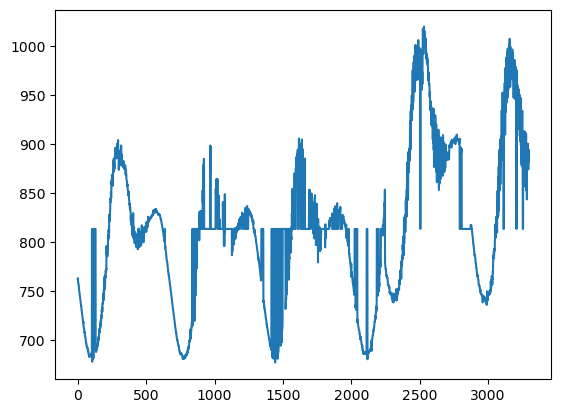

In [19]:
df['pressaoAtmosfericaMediaDiaria'].plot(kind='line')

In [20]:
df.head()

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
0,1,97.039,0,762.4
1,1,97.196,1,762.9
2,1,97.655,2,760.6
3,1,98.113,3,758.1
4,1,98.572,4,757.9


In [21]:
# DEFININDO CONSTANTES IMPORTANTES PARA ELABORAÇÃO DE HIPOTESES COM AS INFORMAÇÕES DISPONÍVEIS
GRAVIDADE_MARCIANA = 3.73 #fonte: https://marspedia.org/Gravity

#fonte: https://www-mars.lmd.jussieu.fr/mars/time/solar_longitude.html
LONGITUDE_SOLAR_PERIASTRO = 251
LONGITUDE_SOLAR_APOASTRO = 70
ANO_MARCIANO = 669 #Sois

DIFERENCA_ENTRE_PONTO_MAIS_ALTO_BAIXO = 22
VIKING_I_LAT_LON = (42,22)

In [22]:
# QUESTÕES LEVANTADAS PELO EXPLORADOR
# É possível ver uma relação entre a pressão atmosferica e a órbita marciana para um ano marciano ?
# É possível ver uma relação entre a pressão atmosferica e a incidências das tempestades globais de areia ?
# Utilizando equações barométricas é possível obter aproximadamente a pressão atmosférica de pontos mais baixos na topografia marciana ?
# Utilizando gráfico de estado físico da água é possível afirmar que a água líquida possa ser estável em algum lugar da superficie marciana em um momento específico ?


10420


<Axes: xlabel='pressaoAtmosfericaMediaDiaria', ylabel='Count'>

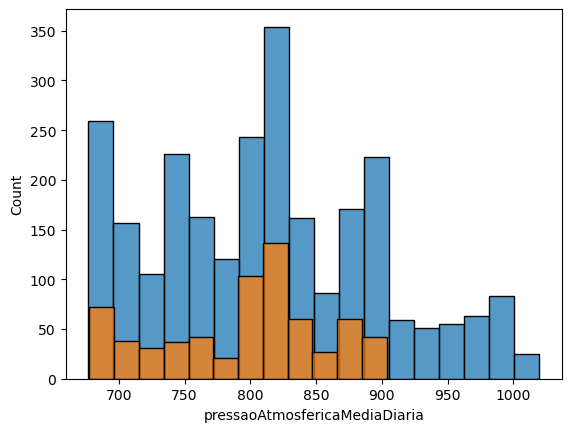

In [23]:
import seaborn as sns
# Compondo histograma para os sois que contém dados válidos de pressão
# Desconsidera os sois sem dados que foram substituidos por "mediaDosValidos"
print(subconjunto.size)
sns.histplot(data=subconjunto, x='pressaoAtmosfericaMediaDiaria')
# Compondo histograma de um ano marciano
sub_df_ano = subconjunto.iloc[:ANO_MARCIANO]
sns.histplot(data=sub_df_ano, x='pressaoAtmosfericaMediaDiaria')

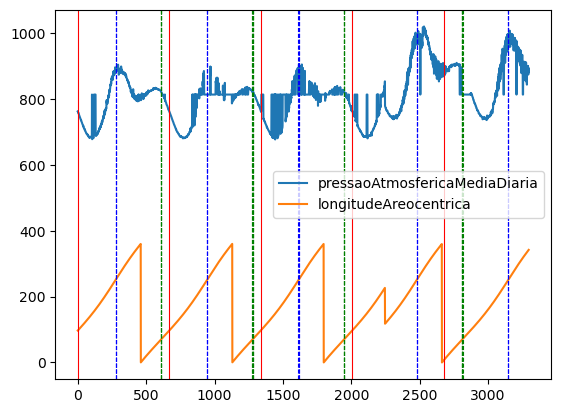

In [24]:
# Plotando longitude areocentrica e pressão atmosférica média diaria em um mesmo gráfico (convenientemente dispostos)
import matplotlib.pyplot as plt
ax = df.plot(y=['pressaoAtmosfericaMediaDiaria','longitudeAreocentrica'], kind='line')
# Adicionando uma linha vertical a cada 669 sois (ano marciano)
for i in range(0, len(df), ANO_MARCIANO):
    plt.axvline(x=i, color='red', linestyle='-', linewidth=0.8)

def proximoDe(valor, proximo):
    if proximo > valor:
        if proximo <= valor+1:
            return True
    else:
        if proximo >= valor-1:
            return True
    return False
    
# Adicionando linhas verticais Verdes a cada Apoastro Marciano
# E linhas verticais marrons a cada Periastro Marciano
for i in range(0, len(df)):
    if proximoDe( LONGITUDE_SOLAR_APOASTRO ,df['longitudeAreocentrica'][i]):
        plt.axvline( x=i, color="green", linestyle='--', linewidth=0.8)
    if proximoDe( LONGITUDE_SOLAR_PERIASTRO ,df['longitudeAreocentrica'][i]):
        plt.axvline( x=i, color="blue", linestyle='--', linewidth=0.8)
    
plt.show()

In [25]:
# Toda vez que marte passa pelo periastro de sua órbita a pressão atmosférica atinge o pico de aproximadamente 900 pascais
# Considerando que, de acordo com a longitude solar areocentrica que marca a posição de Marte em sua órbita, o grau 251
# marca o inverno ameno no hemisfério norte do planeta e verão intenso no hemisfério sul.

# A calota polar norte de Marte é visivelmente maior que a calota polar sul e situa-se no hemisfério mais baixo de
# acordo com a dicotomia topografica hemisférica marciana. Ambos os capeamentos congelados são majoriariamente compostos de dioxido de carbono
# (gás que compõe 96% da tênue atmosfera marciana ou seja a própria atmosfera congelando! ) 

# Hipótese 01: As temperaturas mais altas nas terras altas do hemisfério sul de marte fazem com que as calotas polares austrais
# sublimen intensamente de forma que as calotas polares boreais, que enfrentam um inverno mais ameno, não congelem tanto o gás
# atmosférico. Como resultado tem-se um pico de 900 pascais na localidade de pouso da Viking I (quase 100 Pascais a mais que o
# pico visto no grau de longitude Areocentrica 70 correspondente com o verão ameno no norte e inverno intenso no sul).
# Esta hipótese prova que a excentricidade da órbita Marciana afeta bastante o tempo marciano ao longo de cada ano.

In [26]:
# Complementando a primeira hipótese, vê-se que após Marte passar por o grau 70, apoastro de sua órbita, a pressão atmosférica enfrenta
# uma queda de ~740 para ~650 Pascais (90 Pascais) (a maior queda para cada ano Marciano)

# Hipótese 02: A terras altas austrais, que estão enfrentando um inverno rigoroso e estão em uma altitude superior congelam
# com mais eficiência o CO2 atmosférico enquanto a estável camada congelada boreal, durante o verão ameno, se mantém mais integra devido a
# baixa altitude. Isto explica o pico menor na linha verde (apoastro) seguido de queda na pressão (congelamento do CO2 no sul)

In [27]:
# Hipótese 03: A Precessão giroscópica planetária de Marte pode indica que, daqui a 170.000 anos terrestres (https://www.sciencedirect.com/science/article/abs/pii/S0032063321000477)
#, o hemisfério norte estará alinhado com o periastro da órbita Marciana o que poderá significar (desconsiderando que o planeta perde sua atmosfera para o espaço
# de forma constante devido à ação das partículas carregadas advindas do sol sobre a ausência de uma magnetosfera) em um sublimação mais
# significativa das grandes calotas boreais. O planeta, nas porções menos elevadas, poder ser mais "habitável" devido ao fato de que pressões
# atmosféricas mais altas permitem a existência da água em estado líquido em uma faixa maior de temperaturas entre zero e poucas dezenas acima (°C).

# Verificando um conjunto de dados isotermais para 274,15 kelvin (1°C) e não isobaricos temos (https://webbook.nist.gov/chemistry/fluid/):

wdf = pd.read_csv('isothermalWaterState.csv')
wdf.head()

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,274.0,0.0000,0.000000,infinite,42.814000,45.093000,-1.000000e+07,25.179,33.494,410.14,undefined,8.9722,0.016819,vapor
1,274.0,0.0065,0.000286,3502.6,42.806000,45.082000,1.645300e+02,25.565,33.962,409.61,57.697,8.9698,0.016815,vapor
2,274.0,0.0065,55.500000,0.018018,0.063838,0.063849,2.333400e-01,75.945,75.972,1406.50,-0.024060,1740.1000,0.557730,liquid
3,274.0,0.0100,55.500000,0.018018,0.063838,0.063856,2.333400e-01,75.945,75.972,1406.50,-0.024060,1740.1000,0.557730,liquid
4,274.0,0.0200,55.500000,0.018018,0.063838,0.063874,2.333400e-01,75.945,75.972,1406.50,-0.024060,1740.1000,0.557730,liquid


In [28]:
def barParaPascal(bar=0):
    return bar*100000
def faseParaInteiro(string=""):
    if string == "vapor":
        return 0
    return 1 #liquid
wdf['Phase'] = wdf['Phase'].apply(faseParaInteiro)
wdf['Pressure (bar)'] = wdf['Pressure (bar)'].apply(barParaPascal)

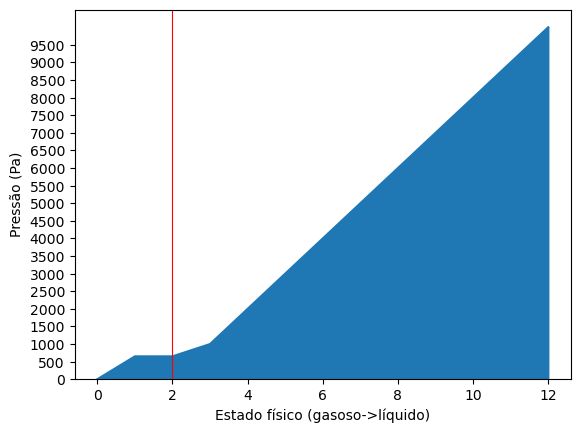

In [29]:
grafico = wdf.plot(y='Pressure (bar)', ylabel="Pressão (Pa)", xlabel="Estado físico (gasoso->líquido)", legend=False ,kind="area")
for i in range(0, len(wdf)):
    if wdf['Phase'][i] == 1:
        plt.axvline(x=i, color='red', linestyle='-', linewidth=0.8) # limite entre vapor e líquido para 26°C
        break
plt.yticks(range(0, 10000, 500))
plt.show()
# limite aproximado de 611 pascais

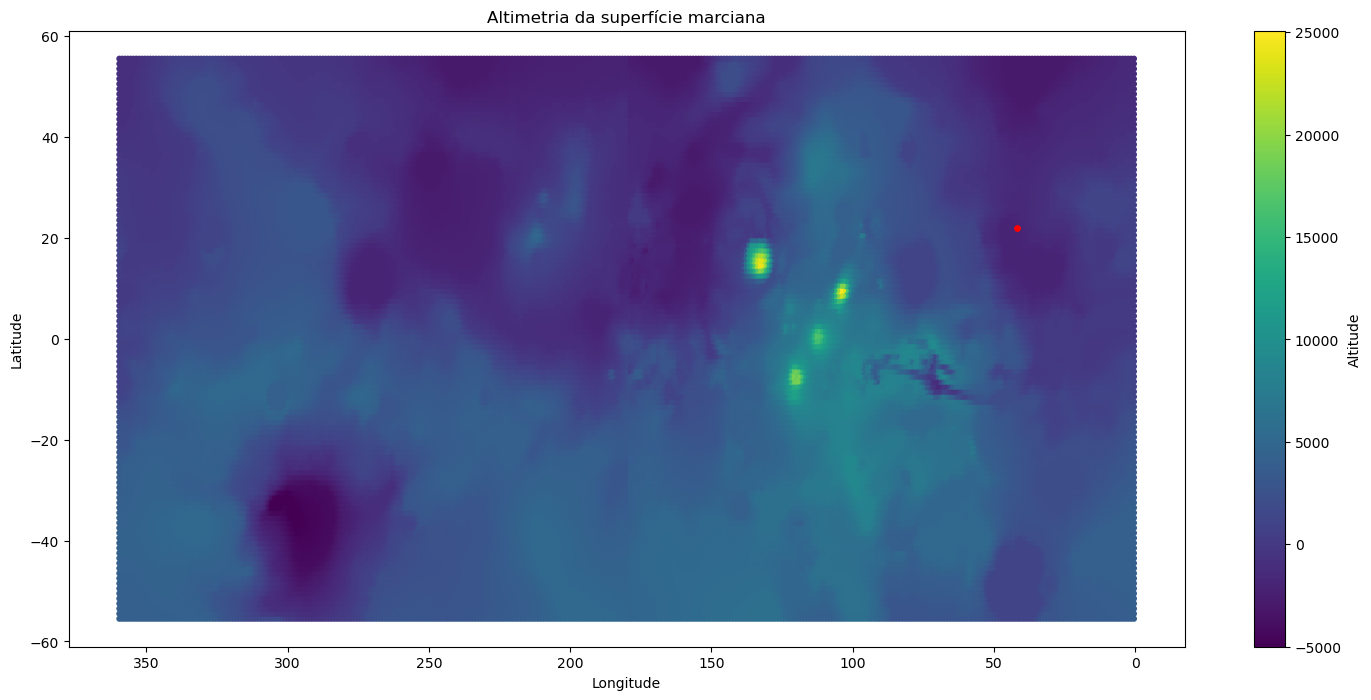

In [30]:
# dados topográficos
tdf = pd.read_csv('topo.csv')
plt.figure(figsize=(18, 8))
scatter = plt.scatter(
    x=tdf['lon'], 
    y=tdf['lat'], 
    c=tdf['elev'], 
    cmap='viridis',
    s=20,
    edgecolor='none'
)

# Adiciona a barra de cores para a altitude
plt.colorbar(scatter, label='Altitude')

# Rótulos e título do gráfico
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Altimetria da superfície marciana')
plt.gca().invert_xaxis()
plt.scatter(VIKING_I_LAT_LON[0],VIKING_I_LAT_LON[1],facecolors='red',alpha=1, s=15) #local de pouso aproximado da Viking I em Chryse Planitia
plt.show()


In [31]:
# DEFININDO EQUAÇÃO BAROMÉTRICA PARA EXPLORAÇÃO DE CONDIÇÕES APROXIMADAS PARA OUTRAS LOCALIDADES

M_marte = 0.044  # Massa molar média de CO₂ em kg/mol
g_marte = 3.71  # Gravidade de Marte em m/s²
R = 8.314  # Constante universal dos gases em J/(mol·K)
T_marte = 210  # Temperatura média planetária de Marte em K

def pressaoBarometrica(P0=0, M=M_marte, g=g_marte, R=R, T=T_marte, h=0):
    """
    Calcula a pressão atmosférica em uma altitude `h` usando a equação barométrica.

    Parâmetros:
    - P0: Pressão ao nível de referência (Pa)
    - M: Massa molar média do gás atmosférico (kg/mol)
    - g: Aceleração gravitacional (m/s²)
    - R: Constante universal dos gases (8.314 J/(mol·K))
    - T: Temperatura média da atmosfera (K)
    - h: Altura em metros (m) na qual se deseja calcular a pressão

    Retorna:
    - P: Pressão atmosférica na altura `h` (Pa)
    """
    # Aplicação da equação barométrica
    P = P0 * math.exp(-M * g * h / (R * T))
    return P



<Axes: xlabel='Count', ylabel='elev'>

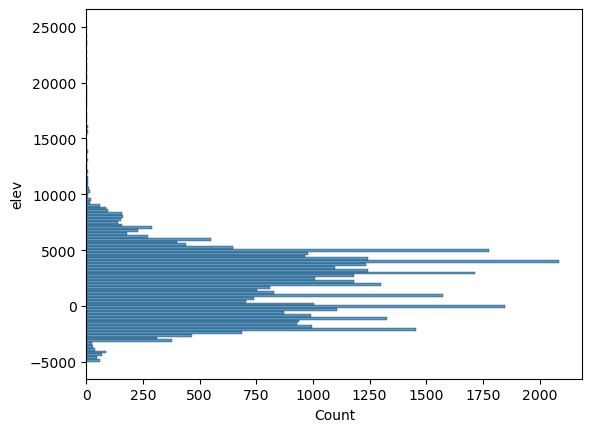

In [41]:
sns.histplot(data=tdf, y='elev')

In [37]:
# variação de pressão Hellas Planitia (porção mais baixa da topografia marciana) em um ano marciano
# não alinhado à longitude Areocentrica
import math
print(
    pressaoBarometrica( sub_df_ano['pressaoAtmosfericaMediaDiaria'].max() ,M_marte,g_marte,R,T_marte, tdf['elev'].min() ),
    pressaoBarometrica( sub_df_ano['pressaoAtmosfericaMediaDiaria'].min() ,M_marte,g_marte,R,T_marte, tdf['elev'].min() ),
    pressaoBarometrica( sub_df_ano['pressaoAtmosfericaMediaDiaria'].mean() ,M_marte,g_marte,R,T_marte, tdf['elev'].mean() ),
    pressaoBarometrica( sub_df_ano['pressaoAtmosfericaMediaDiaria'].max() ,M_marte,g_marte,R,T_marte, tdf['elev'].mean() )
)

1442.4418147392173 1081.432367412363 665.4151120880596 756.0200265026773


In [ ]:
# Hipótese 04: A água, geralmente rica em sais, pode existir em estado líquido nas porções mais baixas da topografia marciana na forma de pequenos fluxos de derretimento. e
# até mesmo nas elevações médias de Marte

#Hipótese 05: Após a descontinuidade entre 2000 e 2500 sois há uma anormalidade nas medições de pressão indicando picos de 1000 pascais o que pode indicar a ocorrências
#das tempestades de areia globais ou ser apenas uma discrepância que surgira devido a malfuncionamento dos sensores da sonda.